The following code is based on and in parts taken from [Medium: Time series prediction with LSTM in Tensorflow](https://towardsdatascience.com/time-series-prediction-with-lstm-in-tensorflow-42104db39340)

author: Andrea D'Agostino<br>
published on: Jun 22, 2022 <br>
title: Time series prediction with LSTM in Tensorflow <br>
accessed: Sep 12, 2023<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    """Helper function to plot our time series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    """Define the trend through slope and time"""
    return slope * time

def seasonal_pattern(season_time):
    """Arbitrary definition of a seasonality pattern"""
    return np.where(season_time < 0.5,
                    np.cos(season_time * 7 * np.pi),
                    3 / np.exp(9* season_time))

def seasonality(time, period, amplitude=1, phase=5):
    """Repeats a pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    """Adds white noise to the series"""
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [3]:
def generate_time_series(y_intercept = 0, slope = 0.005, amplitude = 50, noise_level = 3):
    # Temporal dimension: 4 years of data
    time = np.arange(10 * 30 + 1, dtype="float32")

    # The initial series is nothing more than a straight line which we will then modify with the other functions
    series = trend(time, slope) + y_intercept

    # Add seasonality
    series += seasonality(time, period=30, amplitude=amplitude)

    # Add noise
    series += noise(time, noise_level, seed=51)
    
    return time, series

In [4]:
time, series = generate_time_series(slope = 0.01, amplitude=5, noise_level=0)
# scale the data
series = series / 8

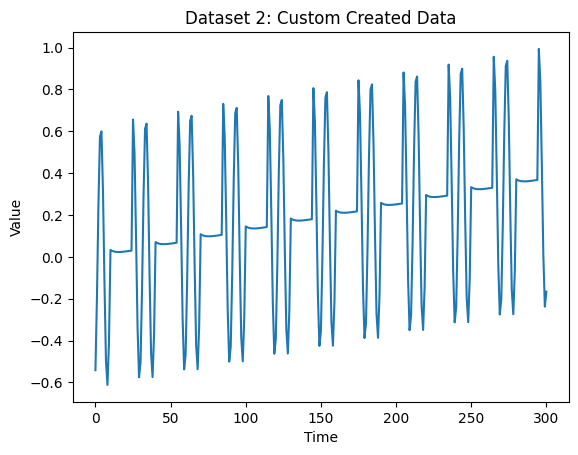

In [7]:
plot_series(time, series)
plt.title("Dataset 2: Custom Created Data")
plt.show()

In [6]:
dataset = pd.DataFrame({"x":time, "y":series})

# safe dataset
# dataset.to_csv("custom_created_pattern.csv", index = False)